In [7]:

# Calculate percentage of dataset with aligned phosphosites
# Adjust the file path below as needed
import pandas as pd
import os

# Use absolute path to the file
aligned_data_path = "/home/htsofie/Desktop/phospho_root/data/processed/rat/full_total_blast_aligned.csv"
print("For blasted and aligned rat data:")

aligned_df = pd.read_csv(aligned_data_path)

# Count total number of phosphosites
total_phosphosites = len(aligned_df)

# Count phosphosites with successful alignment
aligned_phosphosites = aligned_df['alignment_success'].sum()

# Calculate percentage
alignment_percentage = (aligned_phosphosites / total_phosphosites) * 100

# Calculate percentage of phosphosites with match_method == "blast" (from paper_blast)
blast_phosphosites = aligned_df[aligned_df['match_method'] == 'blast'].shape[0]
blast_percentage = (blast_phosphosites / total_phosphosites) * 100

print(f"Total phosphosites in dataset (after cleaning): {total_phosphosites:,}")
print(f"Successfully aligned phosphosites: {aligned_phosphosites:,}")
print(f"Percentage of dataset with aligned phosphosites: {alignment_percentage:.2f}%")
print(f"Percentage of dataset with failed alignment: {100 - alignment_percentage:.2f}%")
print(f"Percentage of phosphosites found from paper_blast: {blast_percentage:.2f}%")

For blasted and aligned rat data:
Total phosphosites in dataset (after cleaning): 23,004
Successfully aligned phosphosites: 21,033
Percentage of dataset with aligned phosphosites: 91.43%
Percentage of dataset with failed alignment: 8.57%
Percentage of phosphosites found from paper_blast: 75.90%


In [6]:

# Calculate percentage of dataset with aligned phosphosites
# Adjust the file path below as needed
import pandas as pd
import os

# Use absolute path to the file
aligned_data_path = "/home/htsofie/Desktop/phospho_root/data/processed/mouse/full_total_blast_aligned.csv"
print("For blasted and aligned mouse data:")

aligned_df = pd.read_csv(aligned_data_path)

# Count total number of phosphosites
total_phosphosites = len(aligned_df)

# Count phosphosites with successful alignment
aligned_phosphosites = aligned_df['alignment_success'].sum()

# Calculate percentage
alignment_percentage = (aligned_phosphosites / total_phosphosites) * 100

# Calculate percentage of phosphosites with match_method == "blast" (from paper_blast)
blast_phosphosites = aligned_df[aligned_df['match_method'] == 'blast'].shape[0]
blast_percentage = (blast_phosphosites / total_phosphosites) * 100

print(f"Total phosphosites in dataset (after cleaning): {total_phosphosites:,}")
print(f"Successfully aligned phosphosites: {aligned_phosphosites:,}")
print(f"Percentage of dataset with aligned phosphosites: {alignment_percentage:.2f}%")
print(f"Percentage of dataset with failed alignment: {100 - alignment_percentage:.2f}%")
print(f"Percentage of phosphosites found from paper_blast: {blast_percentage:.2f}%")

For blasted and aligned mouse data:
Total phosphosites in dataset (after cleaning): 30,442
Successfully aligned phosphosites: 29,484
Percentage of dataset with aligned phosphosites: 96.85%
Percentage of dataset with failed alignment: 3.15%
Percentage of phosphosites found from paper_blast: 92.75%


{'Ser': np.float64(87.39784385324292), 'Thr': np.float64(11.23282907320466), 'Tyr': np.float64(1.3693270735524257)}
{'Ser': np.float64(82.66211155640234), 'Thr': np.float64(15.13698180145851), 'Tyr': np.float64(2.2009066421391497)}


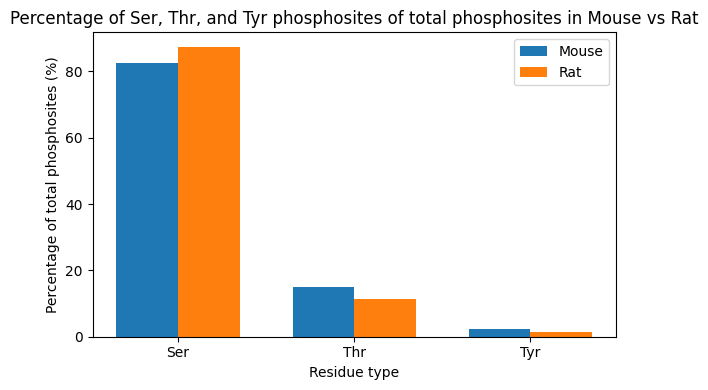

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
rat_path = "/home/htsofie/Desktop/phospho_root/data/processed/rat/full_total_blast_aligned.csv"
mouse_path = "/home/htsofie/Desktop/phospho_root/data/processed/mouse/full_total_blast_aligned.csv"

def calculate_phosphosite_percentages(path):
    df = pd.read_csv(path)
    total = len(df)
    percentages = {
        "Ser": (df["amino_acid"] == "S").sum() / total * 100,
        "Thr": (df["amino_acid"] == "T").sum() / total * 100,
        "Tyr": (df["amino_acid"] == "Y").sum() / total * 100
    }
    return percentages

# Calculate for both
rat_perc = calculate_phosphosite_percentages(rat_path)
mouse_perc = calculate_phosphosite_percentages(mouse_path)
print(rat_perc)
print(mouse_perc)

# Combine into DataFrame
data = pd.DataFrame({
    "residue": ["Ser", "Thr", "Tyr"],
    "mouse": [mouse_perc["Ser"], mouse_perc["Thr"], mouse_perc["Tyr"]],
    "rat": [rat_perc["Ser"], rat_perc["Thr"], rat_perc["Tyr"]]
})

# Melt for plotting
df_melted = data.melt(id_vars="residue", var_name="species", value_name="percent")

# Plot grouped bars
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
x = range(len(data["residue"]))

ax.bar([i - bar_width/2 for i in x], data["mouse"], width=bar_width, label="Mouse")
ax.bar([i + bar_width/2 for i in x], data["rat"], width=bar_width, label="Rat")

ax.set_xticks(x)
ax.set_xticklabels(data["residue"])
ax.set_ylabel("Percentage of total phosphosites (%)")
ax.set_xlabel("Residue type")
ax.set_title("Percentage of Ser, Thr, and Tyr phosphosites of total phosphosites in Mouse vs Rat")
ax.legend()
plt.tight_layout()
plt.show()
